In [44]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import polars.selectors as cs
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pl.read_csv("abalone.data.csv")

In [3]:
df.head()

gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
str,f64,f64,f64,f64,f64,f64,f64,i64
"""M""",0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
"""M""",0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
"""F""",0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
"""M""",0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10
"""I""",0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7


In [4]:
df.null_count()


gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0


In [15]:
df.group_by("gender").count()

C:\Users\naren\AppData\Local\Temp\ipykernel_8256\3811742217.py:1: DeprecationWarning: `GroupBy.count` was renamed; use `GroupBy.len` instead
  df.group_by("gender").count()


gender,count
str,u32
"""M""",1528
"""F""",1307
"""I""",1342


In [17]:
df.describe()

statistic,gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
str,str,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""4177""",4177.0,4177.0,4177.0,4177.0,4177.0,4177.0,4177.0,4177.0
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",null,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
"""std""",null,0.120093,0.09924,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
"""min""","""F""",0.075,0.055,0.0,0.002,0.001,0.0005,0.0015,1.0
"""25%""",null,0.45,0.35,0.115,0.4415,0.186,0.0935,0.13,8.0
"""50%""",null,0.545,0.425,0.14,0.7995,0.336,0.171,0.234,9.0
"""75%""",null,0.615,0.48,0.165,1.153,0.502,0.253,0.329,11.0
"""max""","""M""",0.815,0.65,1.13,2.8255,1.488,0.76,1.005,29.0


In [23]:
corr_matrix = df.select(cs.numeric()).corr()
print(corr_matrix)

shape: (8, 8)
┌──────────┬──────────┬──────────┬─────────────┬─────────────┬─────────────┬────────────┬──────────┐
│ Length   ┆ Diameter ┆ Height   ┆ Whole       ┆ Shucked     ┆ Viscera     ┆ Shell      ┆ Rings    │
│ ---      ┆ ---      ┆ ---      ┆ weight      ┆ weight      ┆ weight      ┆ weight     ┆ ---      │
│ f64      ┆ f64      ┆ f64      ┆ ---         ┆ ---         ┆ ---         ┆ ---        ┆ f64      │
│          ┆          ┆          ┆ f64         ┆ f64         ┆ f64         ┆ f64        ┆          │
╞══════════╪══════════╪══════════╪═════════════╪═════════════╪═════════════╪════════════╪══════════╡
│ 1.0      ┆ 0.986812 ┆ 0.827554 ┆ 0.925261    ┆ 0.897914    ┆ 0.903018    ┆ 0.897706   ┆ 0.55672  │
│ 0.986812 ┆ 1.0      ┆ 0.833684 ┆ 0.925452    ┆ 0.893162    ┆ 0.899724    ┆ 0.90533    ┆ 0.57466  │
│ 0.827554 ┆ 0.833684 ┆ 1.0      ┆ 0.819221    ┆ 0.774972    ┆ 0.798319    ┆ 0.817338   ┆ 0.557467 │
│ 0.925261 ┆ 0.925452 ┆ 0.819221 ┆ 1.0         ┆ 0.969405    ┆ 0.966375    ┆ 

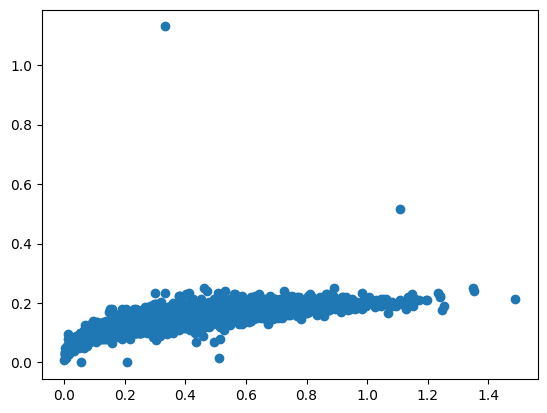

In [31]:
plt.scatter(df["Shucked weight"], df["Height"])

In [32]:
df_ohe = df.to_dummies("gender")

In [34]:
df_ohe

gender_F,gender_I,gender_M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
u8,u8,u8,f64,f64,f64,f64,f64,f64,f64,i64
0,0,1,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,0,1,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
1,0,0,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
0,0,1,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10
0,1,0,0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7
…,…,…,…,…,…,…,…,…,…,…
1,0,0,0.565,0.45,0.165,0.887,0.37,0.239,0.249,11
0,0,1,0.59,0.44,0.135,0.966,0.439,0.2145,0.2605,10
0,0,1,0.6,0.475,0.205,1.176,0.5255,0.2875,0.308,9


In [ ]:
matrix = df_ohe.select(cs.numeric()).corr()
with pl.Config(tbl_cols=-1, tbl_rows=-1):
    print(matrix)
print(matrix)

shape: (11, 11)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ gender_F  ┆ gender_I  ┆ gender_M  ┆ Length    ┆ … ┆ Shucked   ┆ Viscera   ┆ Shell     ┆ Rings    │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ weight    ┆ weight    ┆ weight    ┆ ---      │
│ f64       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ f64      │
│           ┆           ┆           ┆           ┆   ┆ f64       ┆ f64       ┆ f64       ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 1.0       ┆ -0.464298 ┆ -0.512528 ┆ 0.309666  ┆ … ┆ 0.263991  ┆ 0.308444  ┆ 0.306319  ┆ 0.250279 │
│ -0.464298 ┆ 1.0       ┆ -0.522541 ┆ -0.551465 ┆ … ┆ -0.521842 ┆ -0.556081 ┆ -0.546953 ┆ -0.43606 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 3        │
│ -0.512528 ┆ -0.522541 ┆ 1.0       ┆ 0.236543  ┆ … ┆ 0.251793  ┆ 0.242194 

In [40]:
X = df.select(cs.numeric()).to_numpy()
y = df["gender"].to_numpy()

In [ ]:
x

array([[ 0.455 ,  0.365 ,  0.095 , ...,  0.101 ,  0.15  , 15.    ],
       [ 0.35  ,  0.265 ,  0.09  , ...,  0.0485,  0.07  ,  7.    ],
       [ 0.53  ,  0.42  ,  0.135 , ...,  0.1415,  0.21  ,  9.    ],
       ...,
       [ 0.6   ,  0.475 ,  0.205 , ...,  0.2875,  0.308 ,  9.    ],
       [ 0.625 ,  0.485 ,  0.15  , ...,  0.261 ,  0.296 , 10.    ],
       [ 0.71  ,  0.555 ,  0.195 , ...,  0.3765,  0.495 , 12.    ]],
      shape=(4177, 8))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
clf = make_pipeline(
    StandardScaler(), 
    SVC(kernel='rbf', C=1.0, class_weight='balanced')
)

clf.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'


In [50]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
df = pl.read_csv("abalone.data.csv")
le = LabelEncoder()
y = le.fit_transform(df["gender"].to_numpy())
y_pred = clf.predict(X_test)

In [51]:
X = df.select(cs.numeric()).to_numpy()

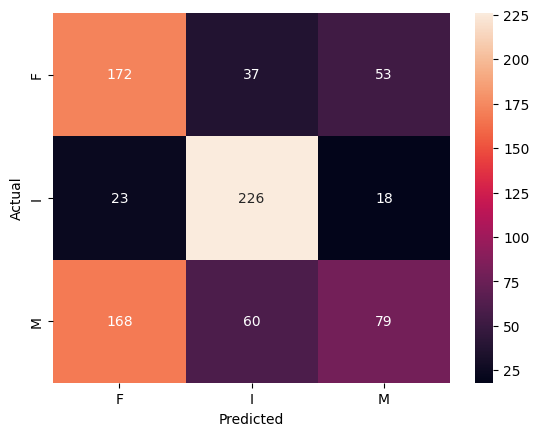

              precision    recall  f1-score   support

           F       0.47      0.66      0.55       262
           I       0.70      0.85      0.77       267
           M       0.53      0.26      0.35       307

    accuracy                           0.57       836
   macro avg       0.57      0.59      0.55       836
weighted avg       0.57      0.57      0.54       836



In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(classification_report(y_test, y_pred, target_names=le.classes_))